In [1]:
import sys
from dotenv import load_dotenv
import os

load_dotenv()

sys.path.append(os.getenv("ROOT"))

In [2]:
import polars as pl
import numpy as np
from datetime import date
from silverfund.datasets.crsp_monthly import CRSPMonthly
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = (
    CRSPMonthly(start_date=date(2006, 1, 1), end_date=date(2024, 12, 31))
    .load_all()
    .select(["permno", "ticker", "date", "shrout", "prc", "ret", "vol"])
)

df

permno,ticker,date,shrout,prc,ret,vol
i64,str,date,f64,f64,f64,f64
10001,"""EWST""",2006-01-31,2930.0,9.49,-0.016495,757.0
10001,"""EWST""",2006-02-28,2931.0,9.39,-0.010537,439.0
10001,"""EWST""",2006-03-31,2932.0,10.99,0.170394,777.0
10001,"""EWST""",2006-04-28,2932.0,9.95,-0.094632,883.0
10001,"""EWST""",2006-05-31,2932.0,9.766,-0.010452,319.0
…,…,…,…,…,…,…
93436,"""TSLA""",2024-08-30,3.19464e6,214.11,-0.077391,1.6108365e7
93436,"""TSLA""",2024-09-30,3.207e6,261.63,0.221942,1.6042065e7
93436,"""TSLA""",2024-10-31,3.207e6,249.85001,-0.045025,1.9014312e7


shape: (9, 2)
┌────────────┬───────────┐
│ statistic  ┆ value     │
│ ---        ┆ ---       │
│ str        ┆ f64       │
╞════════════╪═══════════╡
│ count      ┆ 639817.0  │
│ null_count ┆ 0.0       │
│ mean       ┆ 0.172708  │
│ std        ┆ 1.089065  │
│ min        ┆ -1.0      │
│ 25%        ┆ -0.233977 │
│ 50%        ┆ -0.012561 │
│ 75%        ┆ 0.294574  │
│ max        ┆ 37.328689 │
└────────────┴───────────┘


permno,ticker,date,shrout,prc,ret,vol,logret,diff_vol,goodnews,badnews,news,rev,news_lag,prclag,rev_lag
i64,str,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
10001,"""EWST""",2006-05-31,2932.0,9.766,-0.010452,319.0,-0.010507,-0.638732,0.0,0.0,0.0,null,null,9.95,null
10001,"""EWST""",2006-06-30,2934.0,9.02,-0.076387,1186.0,-0.079462,2.717868,1.0,0.0,1.0,-0.010452,0.0,9.766,null
10001,"""EWST""",2006-07-31,2934.0,10.4399,0.157417,455.0,0.146191,-0.616358,0.0,0.0,0.0,-0.076387,1.0,9.02,-0.010452
10001,"""EWST""",2006-08-31,2934.0,11.63,0.123574,654.0,0.116515,0.437363,0.0,0.0,0.0,0.157417,0.0,10.4399,-0.076387
10001,"""EWST""",2006-09-29,2947.0,11.0,-0.05417,613.0,-0.055692,-0.062691,0.0,0.0,0.0,0.123574,0.0,11.63,0.157417
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
93436,"""TSLA""",2024-08-30,3.19464e6,214.11,-0.077391,1.6108365e7,-0.08055,-0.45,0.0,0.0,0.0,0.172781,0.0,232.07001,0.111186
93436,"""TSLA""",2024-09-30,3.207e6,261.63,0.221942,1.6042065e7,0.200441,-0.004116,0.0,0.0,0.0,-0.077391,0.0,214.11,0.172781
93436,"""TSLA""",2024-10-31,3.207e6,249.85001,-0.045025,1.9014312e7,-0.04607,0.185278,0.0,0.0,0.0,0.221942,0.0,261.63,-0.077391


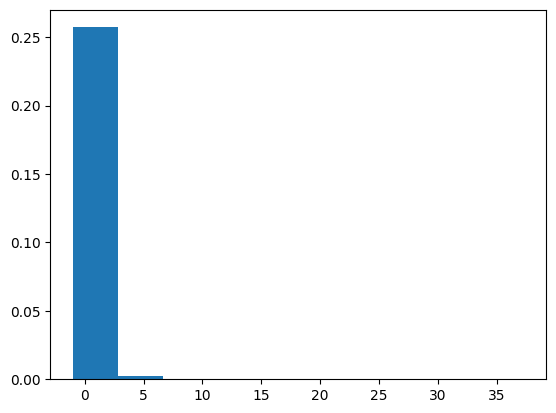

In [ ]:
# Form reversal signal

# Log returns
df = df.with_columns(pl.col("ret").log1p().alias("logret"))


df = df.with_columns(pl.col("vol").pct_change().over("permno").alias("diff_vol"))


df = df.drop_nans(subset=["diff_vol"])
# print((df["diff_vol"]>100).sum())
df = df.filter(~(pl.col("diff_vol").is_infinite()))
std1 = 12.469267

df = df.filter(~(pl.col("diff_vol") >= std1 * 3))

print(df["diff_vol"].describe())
mean = df["diff_vol"].mean()
std = df["diff_vol"].std()


df = df.with_columns((pl.col("diff_vol") >= mean + 2 * std).cast(pl.Float64).alias("goodnews"))
# print(df['goodnews'].sum())
df = df.with_columns((pl.col("diff_vol") <= mean - 2 * std).cast(pl.Float64).alias("badnews"))
# print(df['badnews'].sum())

df = df.with_columns((pl.col("goodnews") - pl.col("badnews")).alias("news"))
# print(df['news'].sum())


# Rolling sum from t-23 to t-1

df = df.with_columns(pl.col("ret").shift(1).over("permno").alias("rev"))
# df = df.with_columns(
#     pl.col("logret")
#     .rolling_sum(window_size=1, min_periods=1)
#     .shift(1)
#     .over("permno")
#     .alias("rev"))


# shift 1
df = df.with_columns(pl.col("news").shift(1).over("permno").alias("news_lag"))

df = df.with_columns(pl.col("rev").shift(1).over("permno").alias("rev_lag"))

plt.hist(df["diff_vol"], density=True)
plt.plot()


# df = df.with_columns((abs(pl.col('diff_vol'))>=2).cast(pl.Float64).alias('news2'))
# print(df['news'].sum())
# print(df['news2'].sum())

# # lagged news
# df = df.with_columns([
#     pl.col("news")
#     .shift(i)
#     .over("permno")
#     .alias(f"news_lag{i}")
#     for i in range(1,31)])


df

In [9]:
# Filters

# Price greater than 5
df = df.with_columns(pl.col("prc").shift(1).over("permno").alias("prclag"))
df = df.filter(pl.col("prclag") > 5)

df = df.drop_nulls(subset=["news_lag"])

# Non-null reversal signal
df = df.drop_nulls(subset=["rev", "rev_lag", "logret"])

df

permno,ticker,date,shrout,prc,ret,vol,logret,diff_vol,goodnews,badnews,news,rev,news_lag,prclag,rev_lag
i64,str,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
10001,"""EWST""",2006-07-31,2934.0,10.4399,0.157417,455.0,0.146191,-0.616358,0.0,0.0,0.0,-0.076387,1.0,9.02,-0.010452
10001,"""EWST""",2006-08-31,2934.0,11.63,0.123574,654.0,0.116515,0.437363,0.0,0.0,0.0,0.157417,0.0,10.4399,-0.076387
10001,"""EWST""",2006-09-29,2947.0,11.0,-0.05417,613.0,-0.055692,-0.062691,0.0,0.0,0.0,0.123574,0.0,11.63,0.157417
10001,"""EWST""",2006-10-31,2947.0,11.08,0.007273,571.0,0.007247,-0.068515,0.0,0.0,0.0,-0.05417,0.0,11.0,0.123574
10001,"""EWST""",2006-11-30,2947.0,11.53,0.051444,737.0,0.050164,0.290718,0.0,0.0,0.0,0.007273,0.0,11.08,-0.05417
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
93436,"""TSLA""",2024-08-30,3.19464e6,214.11,-0.077391,1.6108365e7,-0.08055,-0.45,0.0,0.0,0.0,0.172781,0.0,232.07001,0.111186
93436,"""TSLA""",2024-09-30,3.207e6,261.63,0.221942,1.6042065e7,0.200441,-0.004116,0.0,0.0,0.0,-0.077391,0.0,214.11,0.172781
93436,"""TSLA""",2024-10-31,3.207e6,249.85001,-0.045025,1.9014312e7,-0.04607,0.185278,0.0,0.0,0.0,0.221942,0.0,261.63,-0.077391


In [10]:
import statsmodels.api as sm

In [11]:
df = df.with_columns((pl.col("rev_lag") * pl.col("news_lag")).alias("rev_lag_X_news_lag"))

X = df.select(["rev_lag", "rev_lag_X_news_lag"]).to_pandas()
y = df["rev"].to_pandas()
model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    rev   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              329.5
Date:                Wed, 05 Feb 2025   Prob (F-statistic):                   9.57e-144
Time:                        15:41:07   Log-Likelihood:                      3.8851e+05
No. Observations:              613731   AIC:                                 -7.770e+05
Df Residuals:                  613729   BIC:                                 -7.770e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [13]:
# df = df.with_columns(pl.lit(1).alias('constant'))
# X = df.select(['news'] + [f'news_lag{i}' for i in range(1,31)] + ['constant']).to_numpy()
# y = df['logret'].to_numpy()
# model = sm.OLS(y,X).fit()

# print(model.summary())

In [ ]:
# don't trade with earnings announcements, calendar service
# big jump, kurtosis
# time series volume, rolling window
# news scraper